In [1]:
# Pure Quant Return Prediction Model
def predict_returns(stock_universe):
    features = []
    
    # Technical factors (price/volume patterns)
    features.append(momentum_signals(prices, [1, 3, 12, 36]))  # Multi-timeframe momentum
    features.append(mean_reversion_signals(prices, [5, 20, 60]))  # Mean reversion
    features.append(volume_price_divergence(prices, volume))
    
    # Cross-sectional factors (relative to peers)
    features.append(relative_strength_rank(returns))
    features.append(volatility_rank(volatility))
    features.append(correlation_breakdown(correlation_matrix))
    
    # Market microstructure
    features.append(bid_ask_spread_changes())
    features.append(order_flow_imbalance())
    features.append(high_frequency_reversal())
    
    # Alternative data (no fundamental interpretation)
    features.append(satellite_parking_lot_changes())  # Don't care WHY, just that it predicts
    features.append(social_media_mention_velocity())
    features.append(news_sentiment_momentum())
    
    # Cross-asset signals
    features.append(bond_equity_correlation_breaks())
    features.append(currency_momentum_spillover())
    features.append(commodity_sector_rotation())
    
    # Ensemble prediction
    return ensemble_model.predict(features)  # Random Forest + XGBoost + Neural Network

In [2]:
# Cell 1: Import Libraries and Setup
"""
Cipher Project - Beginner Testing Notebook
This notebook is designed for experimenting with quantitative finance concepts
Each cell builds upon the previous ones, starting with basics and moving to more advanced topics
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("📊 Ready to start quantitative finance experiments")

✅ Libraries imported successfully!
📊 Ready to start quantitative finance experiments


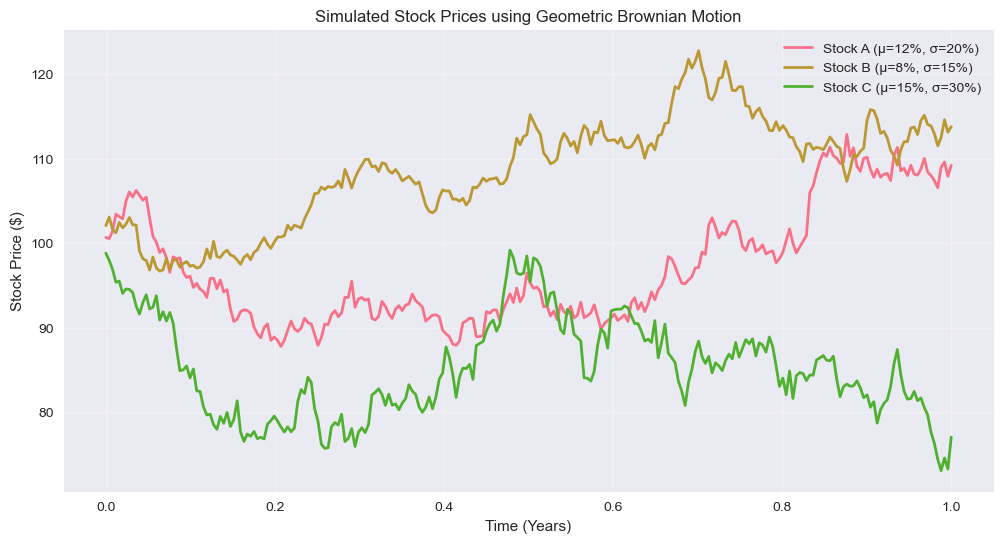

📈 Generated synthetic stock price data
Final prices: Stock A = $109.20, Stock B = $113.76, Stock C = $77.05


In [3]:
# Cell 2: Generate Synthetic Stock Price Data
"""
Let's start by creating fake stock price data using Geometric Brownian Motion
This is the foundation of modern finance - how stock prices are modeled mathematically
Formula: S(t) = S(0) * exp((μ - σ²/2)t + σW(t))
Where:
- S(t) = stock price at time t
- μ = expected return (drift)
- σ = volatility
- W(t) = Brownian motion (random walk)
"""

def generate_stock_prices(S0=100, mu=0.10, sigma=0.20, T=1.0, steps=252):
    """
    Generate stock prices using Geometric Brownian Motion
    
    Parameters:
    S0: Initial stock price ($100)
    mu: Annual expected return (10%)
    sigma: Annual volatility (20%)
    T: Time horizon in years (1 year)
    steps: Number of time steps (252 = trading days in a year)
    """
    dt = T / steps  # Time step size
    
    # Generate random shocks (the "randomness" in stock prices)
    random_shocks = np.random.normal(0, 1, steps)
    
    # Calculate price changes using GBM formula
    price_changes = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_shocks
    
    # Convert to actual prices by taking exponential and cumulative sum
    log_prices = np.cumsum(price_changes)
    prices = S0 * np.exp(log_prices)
    
    # Create time array
    times = np.linspace(0, T, steps)
    
    return times, prices

# Generate sample data for 3 different stocks
np.random.seed(42)  # For reproducible results
times, stock_A = generate_stock_prices(S0=100, mu=0.12, sigma=0.20)  # High return, medium vol
times, stock_B = generate_stock_prices(S0=100, mu=0.08, sigma=0.15)  # Medium return, low vol
times, stock_C = generate_stock_prices(S0=100, mu=0.15, sigma=0.30)  # High return, high vol

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(times, stock_A, label='Stock A (μ=12%, σ=20%)', linewidth=2)
plt.plot(times, stock_B, label='Stock B (μ=8%, σ=15%)', linewidth=2)
plt.plot(times, stock_C, label='Stock C (μ=15%, σ=30%)', linewidth=2)
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price ($)')
plt.title('Simulated Stock Prices using Geometric Brownian Motion')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("📈 Generated synthetic stock price data")
print(f"Final prices: Stock A = ${stock_A[-1]:.2f}, Stock B = ${stock_B[-1]:.2f}, Stock C = ${stock_C[-1]:.2f}")


In [ ]:
# Cell 3: Calculate Basic Financial Metrics
"""
Now let's calculate some fundamental metrics that quantitative traders use:
- Returns (daily percentage changes)
- Volatility (standard deviation of returns)
- Sharpe Ratio (risk-adjusted return)
- Maximum Drawdown (worst peak-to-trough decline)
"""

def calculate_returns(prices):
    """Calculate daily returns from price series"""
    return np.diff(prices) / prices[:-1]

def calculate_volatility(returns, annualize=True):
    """Calculate volatility (standard deviation of returns)"""
    vol = np.std(returns)
    if annualize:
        vol *= np.sqrt(252)  # Annualize using 252 trading days
    return vol

def calculate_sharpe_ratio(returns, risk_free_rate=0.02):
    """Calculate Sharpe ratio (excess return per unit of risk)"""
    excess_returns = np.mean(returns) * 252 - risk_free_rate  # Annualized excess return
    volatility = calculate_volatility(returns)
    return excess_returns / volatility if volatility > 0 else 0

def calculate_max_drawdown(prices):
    """Calculate maximum drawdown (worst peak-to-trough decline)"""
    cumulative_returns = prices / prices[0]  # Normalize to start at 1
    running_max = np.maximum.accumulate(cumulative_returns)
    drawdowns = (cumulative_returns - running_max) / running_max
    return np.min(drawdowns)

# Calculate metrics for all stocks
stocks = {'A': stock_A, 'B': stock_B, 'C': stock_C}
results = {}

for name, prices in stocks.items():
    returns = calculate_returns(prices)
    
    results[name] = {
        'Final Price': prices[-1],
        'Total Return': (prices[-1] / prices[0] - 1) * 100,
        'Annualized Return': (np.mean(returns) * 252) * 100,
        'Volatility': calculate_volatility(returns) * 100,
        'Sharpe Ratio': calculate_sharpe_ratio(returns),
        'Max Drawdown': calculate_max_drawdown(prices) * 100
    }

# Display results in a nice table
results_df = pd.DataFrame(results).T
print("\n📊 STOCK PERFORMANCE METRICS")
print("=" * 60)
print(results_df.round(2))

# Visualize the metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Returns vs Risk scatter plot
axes[0,0].scatter([results[stock]['Volatility'] for stock in results], 
                 [results[stock]['Annualized Return'] for stock in results], 
                 s=100, alpha=0.7)
for i, stock in enumerate(results.keys()):
    axes[0,0].annotate(f'Stock {stock}', 
                      (results[stock]['Volatility'], results[stock]['Annualized Return']),
                      xytext=(5, 5), textcoords='offset points')
axes[0,0].set_xlabel('Volatility (%)')
axes[0,0].set_ylabel('Annualized Return (%)')
axes[0,0].set_title('Risk-Return Profile')
axes[0,0].grid(True, alpha=0.3)

# Sharpe Ratios
sharpe_ratios = [results[stock]['Sharpe Ratio'] for stock in results]
axes[0,1].bar(results.keys(), sharpe_ratios, color=['skyblue', 'lightgreen', 'salmon'])
axes[0,1].set_ylabel('Sharpe Ratio')
axes[0,1].set_title('Risk-Adjusted Performance')
axes[0,1].grid(True, alpha=0.3)

# Drawdown analysis for Stock A
cumulative_A = stock_A / stock_A[0]
running_max_A = np.maximum.accumulate(cumulative_A)
drawdowns_A = (cumulative_A - running_max_A) / running_max_A * 100

axes[1,0].fill_between(times, drawdowns_A, 0, color='red', alpha=0.3)
axes[1,0].plot(times, drawdowns_A, color='red', linewidth=1)
axes[1,0].set_ylabel('Drawdown (%)')
axes[1,0].set_xlabel('Time (Years)')
axes[1,0].set_title('Stock A - Drawdown Analysis')
axes[1,0].grid(True, alpha=0.3)

# Return distribution
returns_A = calculate_returns(stock_A) * 100
axes[1,1].hist(returns_A, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,1].axvline(np.mean(returns_A), color='red', linestyle='--', label=f'Mean: {np.mean(returns_A):.2f}%')
axes[1,1].set_xlabel('Daily Returns (%)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Stock A - Return Distribution')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
